<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(w2v).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [3]:
df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [4]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
disgust    1066
Name: emosi, dtype: int64

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dfblog = pd.read_csv('/content/drive/MyDrive/korpusblog.csv')

In [7]:
dftwit = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')#good

In [8]:
df1 = pd.read_csv(url0)

In [9]:
df1=df1.drop(df1[df1['emosi'] == 'joy'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'sadness'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'anger'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'fear'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'disgust'].sample(frac=1).index)

In [247]:
df2=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus2.txt', delimiter = ";")#good
df2.columns=['dok','tes']

In [163]:
df3=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus3.csv')#vgood

In [191]:
df4=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus4.tsv', delimiter = "	")#good
df4.columns=['dok','num','code']

In [218]:
df5=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/twitter_prosessed2.csv')#good

In [ ]:
# df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
# df3.columns = ["arti"]

persiapan corpus tambahan

In [10]:
final=[]

In [11]:
final.extend(dfblog.teks)

In [12]:
final.extend(dftwit.tweet)

In [13]:
final.extend(df1.dokumen)

In [251]:
final.extend(df2.dok)

In [166]:
final.extend(df3.content)

In [194]:
final.extend(df4.dok)

In [221]:
final.extend(df5.content)

In [14]:
dfg = pd.DataFrame(final)
dfg.columns=["dok"]

preputama : lower case

In [15]:
def lower(temp):
  return temp.str.lower()

In [16]:
df['dokumen']=lower(df['dokumen'])

In [17]:
dfg['dok']=lower(dfg['dok'])

preputama : Pembersihan noise (over enter and space)

In [18]:
def bersih_noise(temp):
  temp=temp.replace(' \n', ' ', regex=True)
  temp=temp.replace('   ', ' ', regex=True)
  return temp.replace('  ', ' ', regex=True)

In [19]:
df=bersih_noise(df)

In [20]:
dfg=bersih_noise(dfg)

preptambah : expand contractions

In [21]:
!pip install contractions
import contractions
def expand_word(temp):
  expanded_words = []   
  for word in temp:
    expanded_words.append(contractions.fix(word))
  return expanded_words

     |████████████████████████████████| 321 kB 5.3 MB/s 
     |████████████████████████████████| 284 kB 50.1 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85443 sha256=9c0413765493ab040e0746a83e5975db74eff06e22ed217c25d9a3835a5a6be4
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [22]:
df.dokumen=expand_word(df.dokumen)

In [23]:
dfg.dok=expand_word(dfg.dok)

preputama : cleansing punctuation

In [24]:
def clns_punc(temp):
  return temp.str.replace(r'[^\w\s]+', '')

In [25]:
df['dokumen'] = clns_punc(df['dokumen'])

In [26]:
dfg['dok'] = clns_punc(dfg['dok'])

preputama : cleansing number

In [27]:
!pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.NUMBER)
def clns_numb(temp):
  sementara=[]
  for word in temp:
    sementara.append(p.clean(word))
  return sementara

In [28]:
df.dokumen=clns_numb(df.dokumen)

In [29]:
dfg.dok=clns_numb(dfg.dok)

preptambah : remove stopword

In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
def remove_stopw(temp):
  temp=temp.str.replace(pat, '')
  return temp.str.replace(r'\s+', ' ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
df['dokumen'] = remove_stopw(df['dokumen'])

In [32]:
dfg['dok'] = remove_stopw(dfg['dok'])

tokenizing

In [33]:
def token(temp):
  return [word_tokenize(x) for x in temp]

In [34]:
df.dokumen=token(df.dokumen)

In [35]:
dfg.dok=token(dfg.dok)

preptambah : Lemmatization

In [36]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def lemma(temp):
  temp.apply(lambda x: [stemmer.stem(y) for y in x])

In [37]:
lemma(df['dokumen'])

In [38]:
lemma(dfg['dok'])

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [282]:
# sent=df.dokumen

In [39]:
sent=dfg.dok.append(df.dokumen,ignore_index=True)

word2ec

In [40]:
from gensim.models import Word2Vec

In [41]:
w2v = Word2Vec(sent, window=5, min_count=1, workers=12, sg=1, iter=1)

In [ ]:
# (sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, 
#  seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, 
#  null_word=0, trim_rule=None, sorted_vocab=1, batch_words=MAX_WORDS_IN_BATCH, compute_loss=False, callbacks=(), max_final_vocab=None)

cek model

In [235]:
w2v.wv.vectors.shape

(38136, 100)

In [236]:
w2v.wv["moment"]

array([ 0.22064793,  0.13383278, -0.40014932, -0.22982682, -0.14954036,
       -0.22837293,  0.07556529, -0.24617144,  0.12746799, -0.39005423,
       -0.374373  , -0.08444659, -0.11226538, -0.54695153, -0.37640923,
       -0.16251189,  0.05250544,  0.17322406, -0.25761327, -0.02613207,
       -0.34545204,  0.4654059 ,  0.47498247, -0.25301644,  0.0342497 ,
       -0.01061559, -0.30524978,  0.11003378,  0.01367352,  0.31894082,
        0.10169601, -0.09161145,  0.25080234, -0.15231559, -0.08173387,
       -0.437407  , -0.18456866,  0.27195677,  0.1978833 ,  0.03841799,
        0.4041493 , -0.23770386,  0.11772051,  0.08642333,  0.11933862,
        0.27750373,  0.2975989 , -0.2833022 ,  0.01469262, -0.3828337 ,
        0.03554281, -0.14425534,  0.25094005, -0.04593056,  0.31647778,
       -0.02640091,  0.30298597, -0.43854845,  0.19584195,  0.17502345,
        0.00524582, -0.06082885,  0.10391854, -0.02191517, -0.30705822,
        0.19117609, -0.05181536,  0.13157934, -0.36872137, -0.09

ekstraksi fitur

In [42]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,w2v.wv[word])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [43]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(5395, 100)
(5395,)


klasifikasi svm

In [44]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

conf matrix dan akurasi

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [243]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

In [46]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

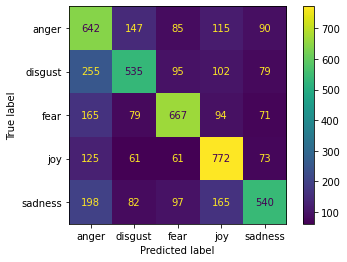

0.5849860982391103
(0.594136638007767, 0.5845591014131954, 0.584651532291305, None)


In [47]:
klasifikasi('poly')

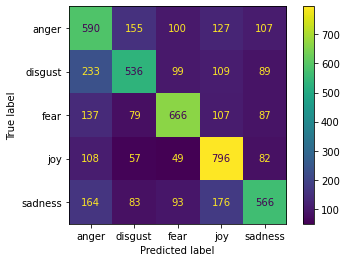

0.5846153846153846
(0.5885098273016603, 0.5841238102190459, 0.5832645806717178, None)


In [48]:
klasifikasi('rbf')

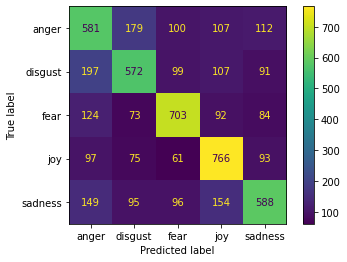

0.5949953660797034
(0.5955236368215796, 0.5946591816642945, 0.5940478220467439, None)


In [49]:
klasifikasi('linear')